# executorlib

https://github.com/BAMresearch/NFDI4IngScientificWorkflowRequirements

## Define workflow with executorlib

In [1]:
import os
from executorlib import SingleNodeExecutor, get_item_from_future

In [2]:
from workflow import (
    generate_mesh, 
    convert_to_xdmf,
    poisson,
    plot_over_line,
    substitute_macros,
    compile_paper,
)

In [3]:
workflow_json_filename = "workflow_executorlib.json"

In [4]:
domain_size = 2.0
source_directory = os.path.abspath(os.path.join(os.curdir, "source"))

with SingleNodeExecutor(export_workflow_filename=workflow_json_filename) as exe:
    gmsh_output_file = exe.submit(
        generate_mesh,
        domain_size=domain_size,
        source_directory=source_directory,
    )
    meshio_output_dict = exe.submit(
        convert_to_xdmf,
        gmsh_output_file=gmsh_output_file,
    )
    poisson_dict = exe.submit(
        poisson,
        meshio_output_xdmf=get_item_from_future(meshio_output_dict, key="xdmf_file"), 
        meshio_output_h5=get_item_from_future(meshio_output_dict, key="h5_file"),
        source_directory=source_directory,
    )
    pvbatch_output_file = exe.submit(
        plot_over_line,
        poisson_output_pvd_file=get_item_from_future(poisson_dict, key="pvd_file"), 
        poisson_output_vtu_file=get_item_from_future(poisson_dict, key="vtu_file"),
        source_directory=source_directory,
    )
    macros_tex_file = exe.submit(
        substitute_macros,
        pvbatch_output_file=pvbatch_output_file, 
        ndofs=get_item_from_future(poisson_dict, key="numdofs"), 
        domain_size=domain_size,
        source_directory=source_directory,
    )
    paper_output = exe.submit(
        compile_paper,
        macros_tex=macros_tex_file, 
        plot_file=pvbatch_output_file,
        source_directory=source_directory,
    )
    task_hash_dict = exe._task_scheduler._task_hash_dict.copy()
    future_hash_dict = exe._task_scheduler._future_hash_dict.copy()

## Load Workflow with pyiron_base

In [5]:
from python_workflow_definition.pyiron_base import load_workflow_json

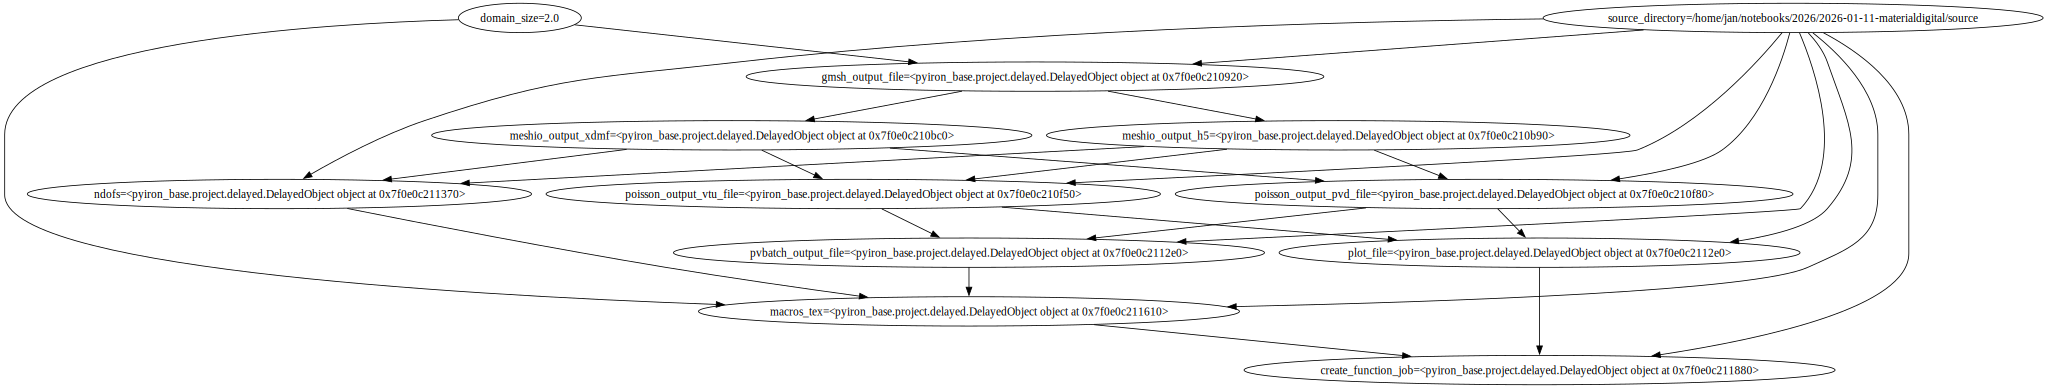

In [6]:
delayed_object_lst = load_workflow_json(file_name=workflow_json_filename)
delayed_object_lst[-1].draw()

In [7]:
delayed_object_lst[-1].pull()

The job generate_mesh_aac69fbaceeeff047d2136e52922192a was saved and received the ID: 25
The job convert_to_xdmf_52420279e23310f0477910acac93ce14 was saved and received the ID: 26
The job poisson_1154f2a730887c7774da02cc77d9b194 was saved and received the ID: 27


/home/jan/miniforge3/envs/processing/lib/python3.9/site-packages/ufl/__init__.py:250: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


The job plot_over_line_6b1affcb3a618483159fd6d75c985b82 was saved and received the ID: 28
The job substitute_macros_783188211c0cbfb785e10a750a4f8243 was saved and received the ID: 29
The job compile_paper_78b27eddb2cdc36c79a4a0e28935921f was saved and received the ID: 30


'/home/jan/notebooks/2026/2026-01-11-materialdigital/postprocessing/paper.pdf'

## Load Workflow with pyiron_workflwo

In [8]:
from python_workflow_definition.pyiron_workflow import load_workflow_json

In [9]:
wf = load_workflow_json(file_name=workflow_json_filename)

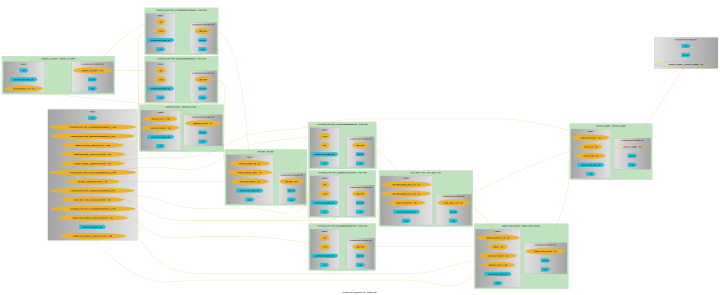

In [10]:
wf.draw(size=(10,10))

In [11]:
wf.run()

/home/jan/miniforge3/envs/processing/lib/python3.9/site-packages/ufl/__init__.py:250: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


{'compile_paper__compile_paper': '/home/jan/notebooks/2026/2026-01-11-materialdigital/postprocessing/paper.pdf'}